In [21]:
#Nombre: Raul Carmelo Villca Saigua
#Carrera: Ing. Sistemas

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [23]:
#Carga de dataset
data = pd.read_csv('/content/Mobile phone price.csv')

In [24]:
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [26]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [27]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [28]:
print(data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Brand                   407 non-null    int64
 1   Model                   407 non-null    int64
 2   Storage                 407 non-null    int64
 3   RAM                     407 non-null    int64
 4   Screen Size (inches)    407 non-null    int64
 5   Camera (MP)             407 non-null    int64
 6   Battery Capacity (mAh)  407 non-null    int64
 7   Price ($)               407 non-null    int64
dtypes: int64(8)
memory usage: 25.6 KB


In [30]:
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [33]:
print(X)
print('SEPARACION  '*5)
print(y)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [34]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5

In [35]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   
406     12     96         0    14                    31           57   

     Battery Capacity (mAh)  
0                      3095  
1                      5000  
2                      4500  
3              

In [36]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [38]:
print(X)

[[ 1.         -2.42943349  1.61519582 ... -1.70075309 -1.35966288
  -1.98624634]
 [ 1.          0.44492532 -0.25850387 ...  1.71661311 -1.72092596
   0.40632724]
 [ 1.         -0.27366438 -1.40827414 ...  1.21033663 -0.44446307
  -0.22164482]
 ...
 [ 1.         -2.42943349  1.57261173 ...  1.21033663 -1.31149447
  -1.24272741]
 [ 1.         -0.03413448  0.99062925 ... -0.81476926 -0.29995783
  -0.81821829]
 [ 1.          0.44492532 -0.31528265 ...  1.21033663 -0.34812624
  -0.22164482]]


In [39]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [40]:
#el descenso por el gradiente se utiliza para encontrar los parámetros(theta) óptimos que minimizan una función de costo.
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 40.83187408  -3.89023553   0.67079372 -12.34539787  -3.29141808
   1.60432384  -2.96979979  -8.72751144]
El valor predecido es (usando el descenso por el gradiente): $51.8502


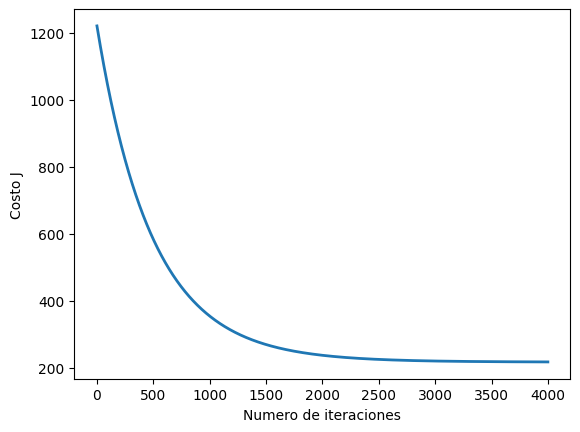

In [50]:
# Elegir algun valor para alpha (probar varias alternativas  mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005)
alpha = 0.001

num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un telefono con distintas caracteristicas
X_array = [1, 12, 100, 4, 1, 35, 0, 5000]
#normaliza cada elemento de la sublista restando la media (mu) y luego dividiendo por la desviación estándar (sigma).
X_array[1:8] = (X_array[1:8] - mu) / sigma

price = np.dot(X_array, theta)

print('El valor predecido es (usando el descenso por el gradiente): ${:.4f}'.format(price))